In [ ]:
import tensorflow as tf

# **Fashion MNIST Classification**

This project focuses on the classification of fashion images using the `Fashion MNIST dataset`. Fashion MNIST is a popular benchmark dataset that consists of 60,000 training images and 10,000 testing images, each of size 28x28 pixels. The dataset contains grayscale images of various fashion items, including clothing, footwear, and accessories, categorized into 10 classes.

The objective of this project is to build a machine learning model capable of accurately classifying fashion images into their respective categories and achieve a high accuracy score.

In [ ]:
# load the data
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# check the shapes
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
# set class_names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Ankle boot')

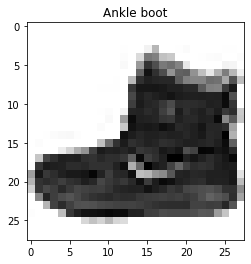

In [ ]:
# visualize one sample
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.title(class_names[y_train[0]])

In [ ]:
# check the labels
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

## Preprocess data

In [ ]:
# check max and min values of X
X_train.min(), X_train.max()


(0, 255)

In [ ]:
# normalize X
X_train = X_train/X_train.max()
X_test = X_test/X_test.max()
X_train.min(), X_train.max()

(0.0, 1.0)

In [ ]:
# check the type of labels
y_train.dtype

dtype('uint8')

## Build a model

In [ ]:
accuracy_hist = [10.00, 10.00]

In [ ]:

def save_accuracy(accuracy_hist, new_record):
  accuracy_hist.append(tf.round(new_record*100).numpy())


In [ ]:
# set a random seed
tf.random.set_seed(42)

# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation="relu", name="hidden_layer_1"),
    tf.keras.layers.Dense(32, activation="relu", name="hidden_layer_2"),
    tf.keras.layers.Dense(16, activation="relu", name="hidden_layer_3"),
    tf.keras.layers.Dense(10, activation="softmax", name="output_layer"),
], name="Multi-class_classification_model")

In [ ]:
# create callbacks
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

In [ ]:
# compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), metrics=["accuracy"])

In [ ]:
# fit the model
history = model.fit(X_train, y_train, verbose=0, epochs=40, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

In [ ]:
# evaluate the model
import numpy as np
# 1st: accuracy: 10% -> lower the lr --> not good
# 2nd accuracy: 10% --> increase the num of hidden units --> slightly better
model.evaluate(X_test, y_test)
save_accuracy(accuracy_hist, history.history["accuracy"][-1])

313/313 [==============================] - 1s 2ms/step - loss: 0.4208 - accuracy: 0.8583


In [ ]:
import pandas as pd
pd.DataFrame(accuracy_hist, columns=["accuracy [%]"])

,accuracy [%]
0,10.0
1,10.0
2,10.32
3,10.321666
4,10.321666
5,10.321666
6,10.321666
7,87.645
8,87.809998
9,87.809998


## Visualize training data

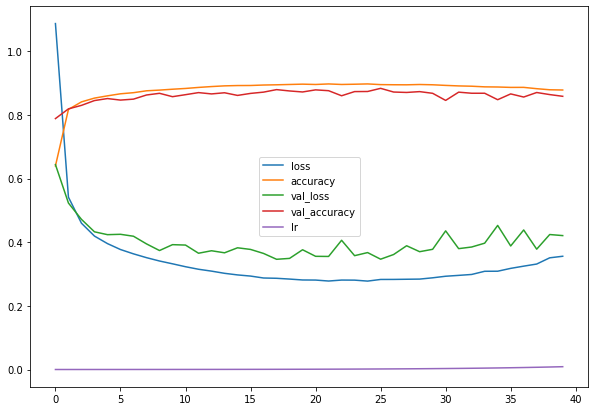

In [ ]:
# plot the loss curve
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.savefig('/content/drive/MyDrive/TensorFlow_course/saved_models/Loss_curve')

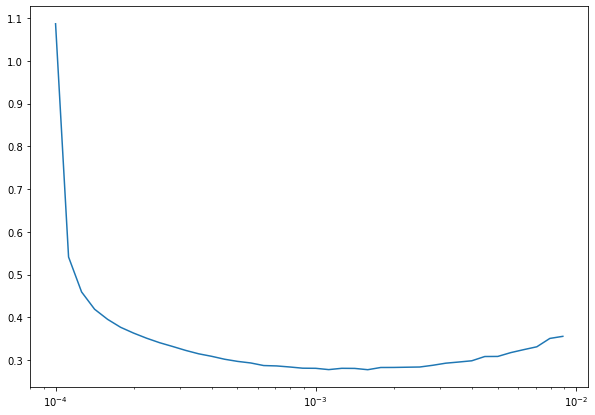

In [ ]:
# plot the learning rate vs loss
plt.figure(figsize=(10,7))
plt.semilogx(history.history["lr"], history.history["loss"])
plt.savefig('/content/drive/MyDrive/TensorFlow_course/saved_models/Lr_vs_loss')

## Plot confusion matrix

In [ ]:
# make predictions
y_probs = model.predict(X_test)
y_preds = tf.round(y_probs) # still one-hot encoded

313/313 [==============================] - 0s 2ms/step


## Predicted labels are still one-hot encoded!!!

In [ ]:
# decoding one-hot encoding
import numpy as np
y_preds =np.argmax(y_preds, axis=1)

In [ ]:
# create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, figsize, classes=None, text_size=20):

  cm = confusion_matrix(y_true, tf.round(y_pred))
  # normalize the confusion matrix
  cm_norm = cm.astype("float")/ cm.sum(axis=1)[:, np.newaxis]

  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)

  # create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # set labels to be classes
  if classes:
    labels = classes
  else:
    labels= np.arange(cm.shape[0])

  # label the axes
  ax.set(title="confusion matrix",
        xlabel="predicted_label",
        ylabel="true_label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels,
        )

  # set x -axis labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # set threshold for different colors
  threshold =(cm.max()+cm.min())/2

  # plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(i,j,f"{cm[i,j]} ({cm_norm[i,j]*100: .1f}%)",
    horizontalalignment="center",
    color= "white" if cm[i,j] > threshold else "black",
    size=text_size
    )

  # adjust the lable size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

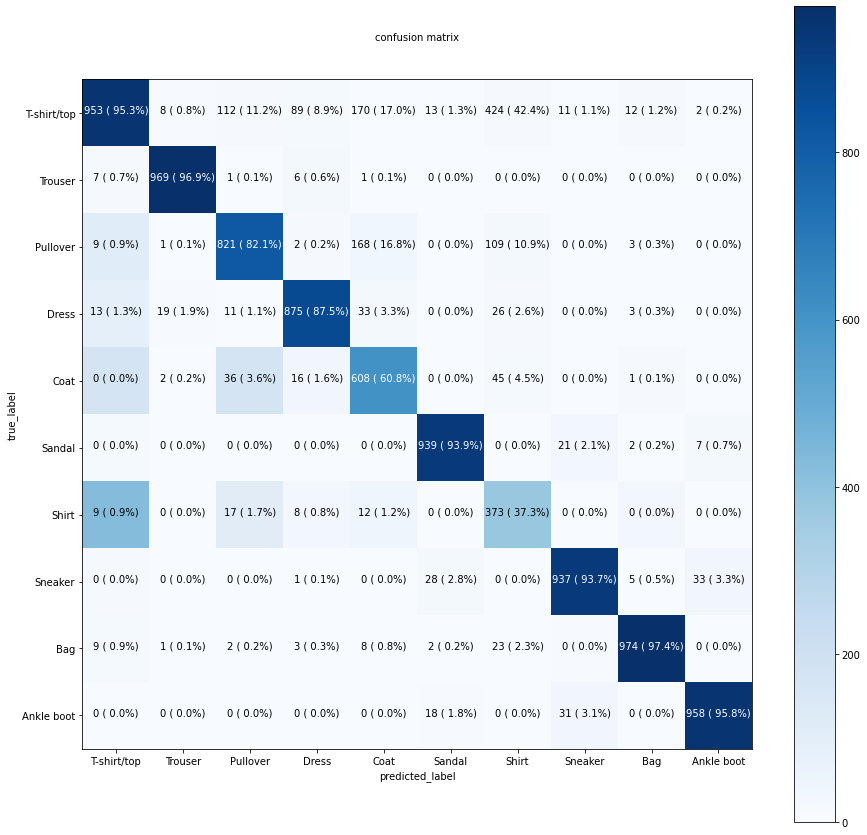

In [ ]:
plot_confusion_matrix(y_true=y_test, y_pred=y_preds, figsize=(15,15), classes=class_names, text_size=10)
plt.savefig('/content/drive/MyDrive/TensorFlow_course/saved_models/confusion_matrix')

In [ ]:
# save the model
model.save("/content/drive/MyDrive/TensorFlow_course/saved_models/Mulyi-class_classification_model")